In [1]:
library(shiny)

In [2]:
library(tidyverse) # shiny사용시 tidyverse패키지 사용하면 편리

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.2.1     √ purrr   0.3.3
√ tibble  2.1.3     √ dplyr   0.8.3
√ tidyr   1.0.0     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [ ]:
# 간단한 Shiny app 만들기
library(shiny)
ui<-fluidPage(
'Hello')

server<-function(input, output, server){}
shinyApp(ui=ui, server=server)


Listening on http://127.0.0.1:5073



In [ ]:
#selectInput:선택 입력을 받을 때
#inputId : dataset이라는 이름으로 server 객체에 전달
#label : 앱에 레이블로 표시됨
#choices : 선택할 보기를 직접 입력
#verbatimTextOutput, tableOutput의 outputId는 server의 실행결과를 받아서 app UI에 출력
ui<-fluidPage(
  selectInput(inputId = 'dataset',
              label='dataset',
              choices=ls(name='package:datasets')),
  verbatimTextOutput(outputId='summary'),
  tableOutput(outputId = 'table')
)
#renderPrint : 콘솔에 출력되는 걸 app에다가 출력시킬때
#renderTable : 테이블을 app에다가 출력시킬떄
server<-function(input, output, session){
  output$summary<-renderPrint({
    dataset<-get(x=input$dataset,
                 pos='package:datasets')
    summary(object=dataset)
  })
  output$table<-renderTable({
    dataset<-get(x=input$dataset,
                 pos='package:datasets')
    dataset
  })
}
shinyApp(ui=ui, server=server)

In [ ]:
# sidebarLayout() : 앱 화면 왼쪽에서 사이드바를 만들어 화면을 2개로 분할하는 셈
# sidebarPane(), mainPanel() 사용!
# fluidRow() : 앱 화면을 가로로 분할
ui<-fluidPage(
  titlePanel(title='explore dataset'),
  sidebarPanel(
    selectInput(
      inputId = 'dataset',
      label = 'dataset',
      choices = ls(name='package:datasets'))
  ),
  mainPanel(
    verbatimTextOutput(outputId = 'summary'),
    tableOutput(outputId='table')
  )
)

#renderPrint : 콘솔에 출력되는 걸 app에다가 출력시킬때
#renderTable : 테이블을 app에다가 출력시킬떄
server<-function(input, output, session){
  output$summary<-renderPrint({
    dataset<-get(x=input$dataset,
                 pos='package:datasets')
    summary(object=dataset)
  })
  output$table<-renderTable({
    dataset<-get(x=input$dataset,
                 pos='package:datasets')
    dataset
  })
}
shinyApp(ui=ui, server=server)

# UI

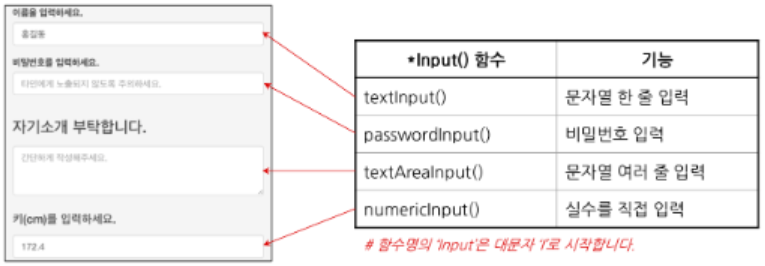

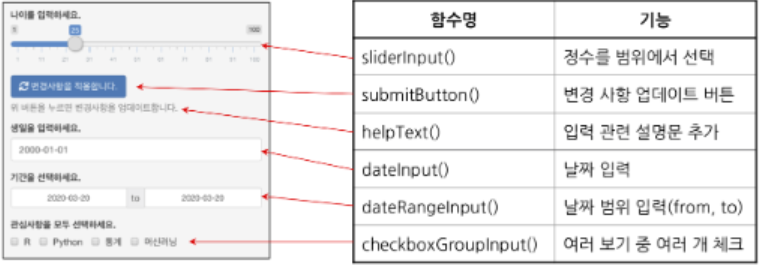

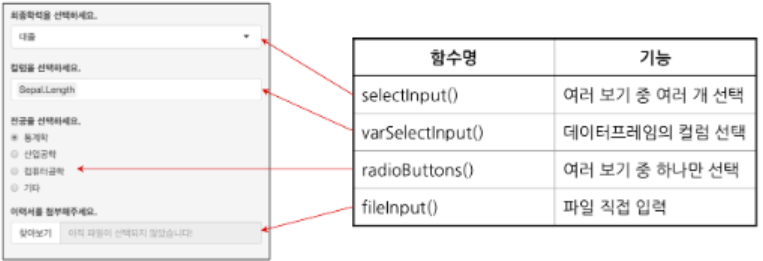

In [5]:
library("IRdisplay")
display_png(file="C:/Users/joyh1/Desktop/빅데이터_20-1/sns_picture/1.png")
display_png(file="C:/Users/joyh1/Desktop/빅데이터_20-1/sns_picture/2.png")
display_png(file="C:/Users/joyh1/Desktop/빅데이터_20-1/sns_picture/3.png")

In [ ]:
ui<-fluidPage(
  sidebarPanel(
    textInput(inputId='name',
              label='write your name',
              value='young-hun-jo'),
    passwordInput(inputId = 'pw',
                  label='write your password',
                  placeholder="don't expose your pw to others"),
    textAreaInput(inputId='intro',
                  label=h3('please introduce yourself'),#HTML언어에서 제목크기(h3)
                  value='',
                  rows=3,#입력할 칸 크기 지정
                  placeholder='please write it simply'),
    numericInput(inputId = 'ht',
                 label=h4('write your height(cm)'),
                 value=172.4,
                 min=50,
                 max=250),
    sliderInput(inputId='age',
                label='write your age',
                value=25,#만약 c(25,30)이렇게하면 범위로 입력받음!
                min=1,
                max=120,
                step=1),#step으로 눈금한칸당 간격
    submitButton(text='change your info',#변경사항 한 번에 업데이트할 버튼 만들어주기
                 icon=icon(name='refresh')),
    helpText('if push this button, update it')
  ),
  mainPanel(
    dateInput(inputId='birth',
              label='write your birthdate',
              value='2000-01-01'),
    dateRangeInput(inputId = 'period',
                   label='select period'),
    checkboxGroupInput(inputId = 'item',
                       label='select all your interest',
                       choices = c('R','Python','Java','Machine Learining'),
                       selected=NULL,#미리 체크하는 초기값 없게하기
                       inline=TRUE),#보기를 한줄로 나열 디폴트는 FALSE값
    selectInput(inputId = 'edu',
                label='select your final edu',
                choices = c('elementary'='e','middle'='m','high'='h','college'='c','univ'='u','master'='m'),
                selected = 'u',#미리 초기값설정(choices에서 미리 dict형태비슷하게 설정해놓았기 때문)
                multiple = FALSE),# 다중선택 가능여부
    varSelectInput(inputId = 'vars', #varSelectInput은 데이터프레임의 칼럼선택할 때 사용
                   label='select column',
                   data=iris,#데이터프레임지정
                   selected = 'Sepal.Length',# multiple=TRUE이면 출력했을 때 이부분을 복수로 지정 가능
                   multiple=TRUE),
    radioButtons(inputId = 'major',
                 label='select your major',
                 choices = c('statistics','engineering','healthcare'),
                 selected = NULL,
                 inline=FALSE),
    fileInput(inputId = 'resume',
              label='submit your resume',
              buttonLabel = 'find your local',
              placeholder = 'not selected by you yet'),
    actionButton(inputId = 'do',#app에서 버튼을클릭했을 때 server에서 준비된 작업 실행함!
                 label='Click!')
  )
)
server<-function(input, output, server){}
shinyApp(ui=ui, server=server)

# Server

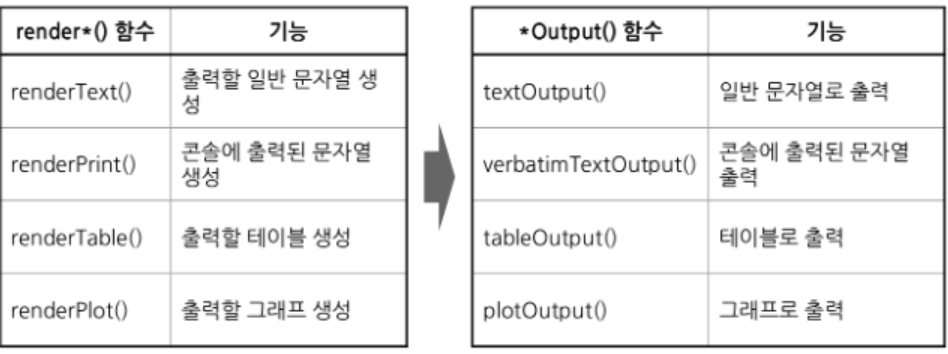

In [6]:
display_png(file="C:/Users/joyh1/Desktop/빅데이터_20-1/sns_picture/4.png")

In [ ]:
library(shinythemes)
ui<-fluidPage(
  theme = shinytheme('superhero'),
  sidebarPanel(
    textInput(inputId='name',
              label='write your name',
              value='hong-gil-dong'),
    numericInput(inputId='height',
              label='write your height',
              value=170,
              min=130,
              max=200)
  ),
  mainPanel(
    textOutput(outputId = 'user'),
    verbatimTextOutput(outputId = 'height'),
    tableOutput(outputId = 'table'),
    plotOutput(outputId = 'histo', width='400px')
  )
)
server<-function(input, output, session){
  output$user<-renderText({
    str_c(input$name, 'client!',sep=' ')
  })
  output$height<-renderPrint({
    cat('Your height is',input$height,'!!')
  })
  output$table<-renderTable({
    data.frame(name=input$name, height=input$height)
  })
  output$histo<-renderPlot({
    heights<-rnorm(n=input$size, mean=172.4, std=5.7)
    hist(x=heights, breaks=20, col='gray50', border='gray30')
  })
}
shinyApp(ui=ui, server=server)

## reactive함수

- render로시작하는 함수 중복피하기 위해 사용! , 가독성도 향상되며 오류 수정도 쉬워짐

In [ ]:
server<-function(input, output, session){
  dataset<-reactive({#reactive함수 뒤에다가 사용할 구체적인 인자들 담아서 dataset객체에 할당 
    get(x=input$dataset, pos='package:datasets')
  })
  output$summary<-renderPrint({
    summary(object=dataset())#그냥 dataset(), 마치함수처럼 사용가능!
  })
  output$table<-renderTable({
    dataset()
  })
}

## 체질량지수 만들기

In [ ]:
ui<-fluidPage(
  theme=shinytheme('superhero'),
  titlePanel(title='BMI calculator'),
  sidebarPanel(
    numericInput(inputId='wt',
                 label='weight(kg)',
                 value=72.1,
                 min=30,
                 max=250),
    numericInput(inputId = 'ht',
                 label='height(cm)',
                 value=170,
                 min=130,
                 max=200)
    ),
  mainPanel(
    h3('check your BMI'),
    h4('write your weight'),
    verbatimTextOutput(outputId = 'wt'),
    h4('write your height'),
    verbatimTextOutput(outputId = 'ht'),
    br(),
    h4('finish calculating your BMI'),
    verbatimTextOutput(outputId = 'bmi'),
    h4('What is your result?'),
    verbatimTextOutput(outputId = 'result')
  )
  )
)
server<-function(input, output, session){
  bmi<-reactive(x=input$wt/(input$ht/100)^2)
  output$wt<-renderPrint(expr = input$wt)
  output$ht<-renderPrint(expr = input$ht)
  output$bmi<-renderPrint(expr=bmi())
  output$result<-renderPrint({
    if(bmi() >= 30){
      '고도비만'
    } else if(bmi() >= 25){
      '과제충'
    } else if(bmi() >= 18.5){
      '정상체중'
    }
  })
}
shinyApp(ui=ui, server=server)

# 동적인 UI

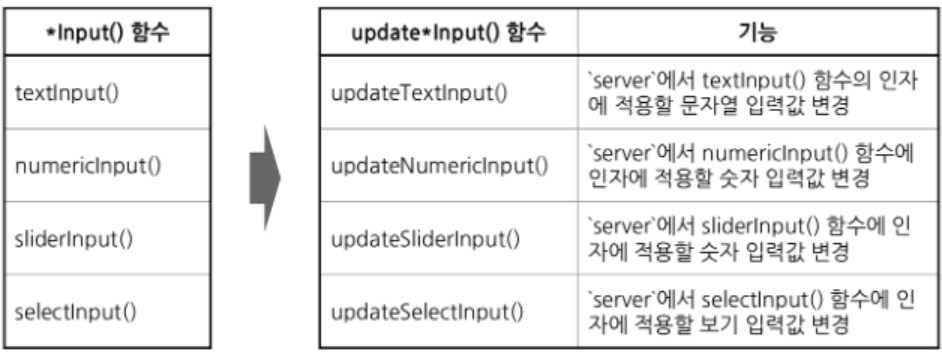

In [7]:
display_png(file="C:/Users/joyh1/Desktop/빅데이터_20-1/sns_picture/5.png")

In [ ]:
#문자열 업데이트
ui<-fluidPage(
  h3('hands_on'),
  textInput(inputId = 'blood',
            label='write your blood type', value='A'),
  textInput(inputId = 'detail',
            label='What property of A blood type')
)
server<-function(input, output, session){
  observe({#첫번째인자는 session, 두번째인자는 업데이트 결과를 적용할 inputid쓰기! 그리고 label에 어떻게 출력할w지
    updateTextInput(session=session,
                    inputId = 'detail',
                    label = str_c(input$blood, '매력은?'))
  })
}
shinyApp(ui=ui, server=server)

#숫자 업데이트 
ui<-fluidPage(
  h3('hands_on updating numeric'),
  numericInput(inputId = 'min',
               label='select minimum',
               value=0),
  numericInput(inputId = 'max',
               label='select maximum',
               value=10),
  sliderInput(inputId = 'range',
              label='',
              min=0, 
              max=10, 
              value=5)
)
server<-function(input, output, session){
  observe({
    updateNumericInput(session=session, inputId = 'range',
                       min=input$min, max=input$max)
  })
}
shinyApp(ui=ui, server=server)

#슬라이드 업데이트
ui<-fluidPage(
  h3('hands_on updating slider'),
  numericInput(inputId = 'income',
               label='monthly income',
               value=300),
  sliderInput(inputId = 'save',
              label='hope income',
              value=50,
              min=0,
              max=150)
)
server<-function(input, output, session){
  observe({
    x<-input$income
    updateNumericInput(session=session,
                       inputId='save',
                       value=x*0.5,
                       min=x*0.2,
                       max=x*0.8)
  })
}
shinyApp(ui=ui, server=server)

#선택 업데이트
ui<-fluidPage(
  h3('hands_on updating select'),
  textInput(inputId = 'example',
            label='보기 입력하시오',
            placeholder='[보기1,보기2]와 같이 콤마를 추가하시오'),
  selectInput(inputId = 'inSelect', label='', choices=NULL)
)
server<-function(input, output, session){
  observe({
    x<-str_split(string=input$example, pattern=',') %>% unlist()
    updateSelectInput(session=session,
                      inputId = 'inSelect',
                      choices=x,
                      label='다음 보기중 하나만 고르시오')
  })
}
shinyApp(ui=ui, server=server)

## renderUI

In [ ]:
output$mainUI<-renderUI({
  if(input$name = '홍길동'){
    taglist(
      h5('안내 입력하시는 내용으로 변경됩니다'),
      tabPanel(title='profile', tableOutput(outputId = 'profile'))
    )
  else{
    tabsetPanel(
      type='tabs',
      tabPanel(title='profile', tableOutput(outputId = 'profile')),
      tabPanel(title='plot1', plotOutput(outputId = 'histogram')),
      tabPanel(title='plot2', plotOutput(outputId = 'boxplot'))
  }
  }
})

## 텍스트,csv파일 갖고와서 산점도그리기 예제

In [ ]:
ui<-fluidPage(
  theme=shinytheme('united'),
  titlePanel(title='텍스트 파일 불러와서 산점도 그리기'),
  sidebarPanel(
    fileInput(inputId = 'file',
              label='csv or txt file',
              multiple = FALSE,
              buttonLabel = icon(name='search'),
              placeholder = '아직파일 선택되지 않음'),
    radioButtons(inputId = 'sep',
                 label='구분자 선택',
                 choices=c('콤마'=',', '세미콜론'=';',
                           '탭'='\t', '공백'=' '),
                 selected= ',',
                 inline=TRUE),
    checkboxInput(inputId = 'header',
                  label='첫 번째항은 헤더입니다',
                  value=TRUE),
    selectInput(inputId = 'x',
                label='x축에 놓을 숫자형 변수를 선택하세요',
                choices=NULL),
    selectInput(inputId = 'y',
                label='y축에 놓을 숫자형 변수를 선택하세요',
                choices=NULL),
    selectInput(inputId = 'z',
                label='z축에 놓을 숫자형 변수를 선택하세요',
                choices=NULL),
    submitButton(text='변경사항을 적용합니다',
                 icon=icon(name='sync'))
  ),
  mainPanel(
    uiOutput(outputId = 'mainUI')
  )
)
server<-function(input, output, session){
  df<-reactive({
    if(is.null(x= input$file)) return()
    read.csv(file=input$file$datapath, header=input$header,
             sep=input$sep, stringAsFactors=TRUE)
  })
  observe({
    cols<-colnames(x=df())
    updateSelectInput(session=session, inputId = 'x', choices = cols)
    updateSelectInput(session=session, inputId = 'y', choices = cols)
    updateSelectInput(session=session, inputId = 'z', choices = cols)
  })
  output$table<-renderTable({
    if(is.null(x=df())) return() else df()[1:5,]
  })
  output$glimpse<-renderPrint({
    if(is.null(x=df())) return() else glimpse(x=df())
  })
  output$plot<-renderPlot({
    ggplot(data=df(),
           mapping=aes(x=df()[,input$x],
                       y=df()[,input$y],
                       color=df()[,input$z]))+
      geom_point(shape=19, size=3) +
      lab(title='scatter plot', x=input$x, y=input$y) +
      theme_bw() +
      theme(plot.title=element_text(face='bold', hjust=0.5),
            legend.title = element_blank(),
            legend.position = 'bottom')
  })
  output$mainUI<-renderUI({
    if(is.null(x=df())) h4('아직 표시할 내용없음')
    else tabsetPanel(
      tabPanel(title='data',
               tableOutput(outputId = 'table'),
               verbatimTextOutput(outputId = 'glimpse')),
      tabPanel(title='plot',
               plotOutput(outputId = 'plot'))
    )
  })
}
shinyApp(ui=ui, server=server)

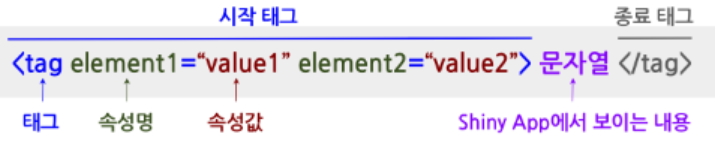

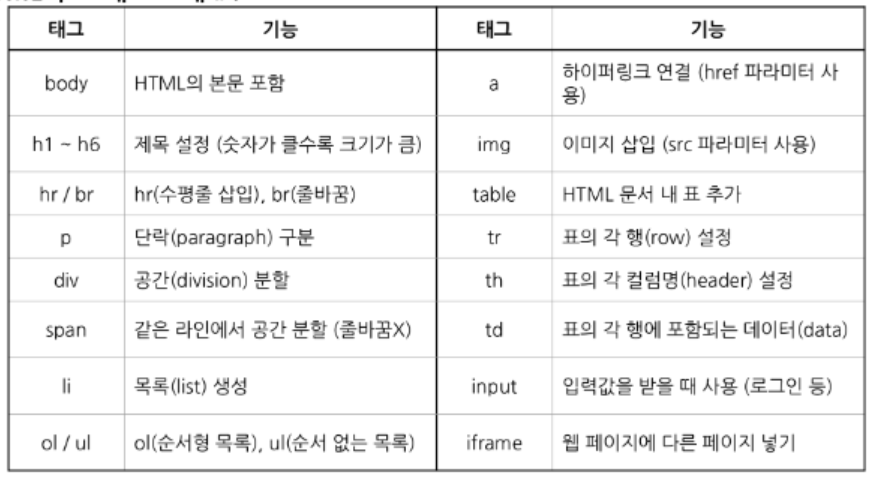

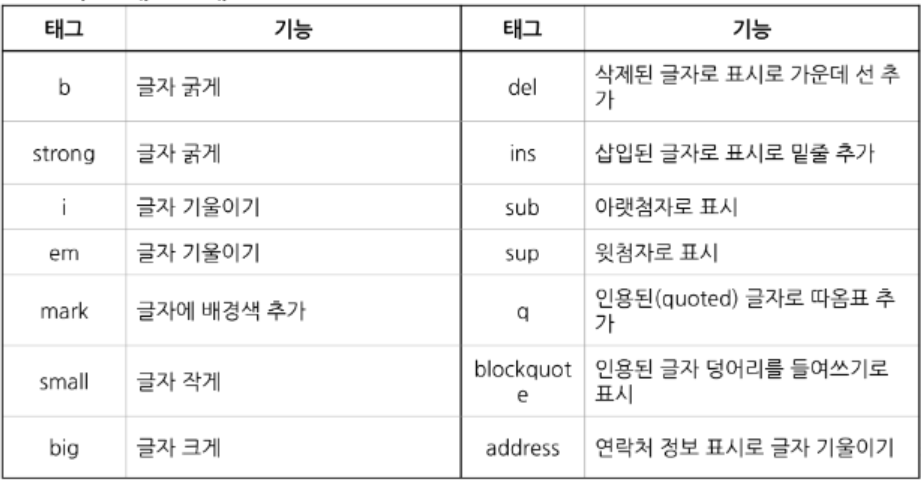

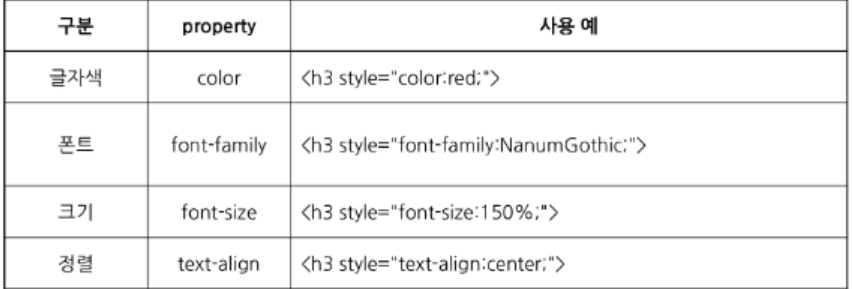

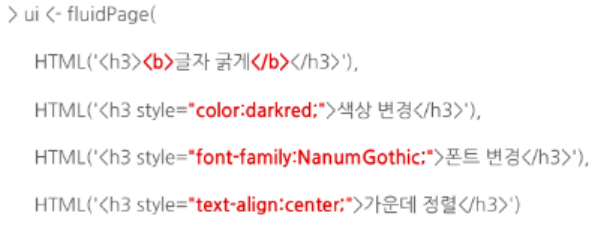

In [8]:
display_png(file="C:/Users/joyh1/Desktop/빅데이터_20-1/sns_picture/6.png")
display_png(file="C:/Users/joyh1/Desktop/빅데이터_20-1/sns_picture/7.png")
display_png(file="C:/Users/joyh1/Desktop/빅데이터_20-1/sns_picture/8.png")
display_png(file="C:/Users/joyh1/Desktop/빅데이터_20-1/sns_picture/9.png")
display_png(file="C:/Users/joyh1/Desktop/빅데이터_20-1/sns_picture/0.png")

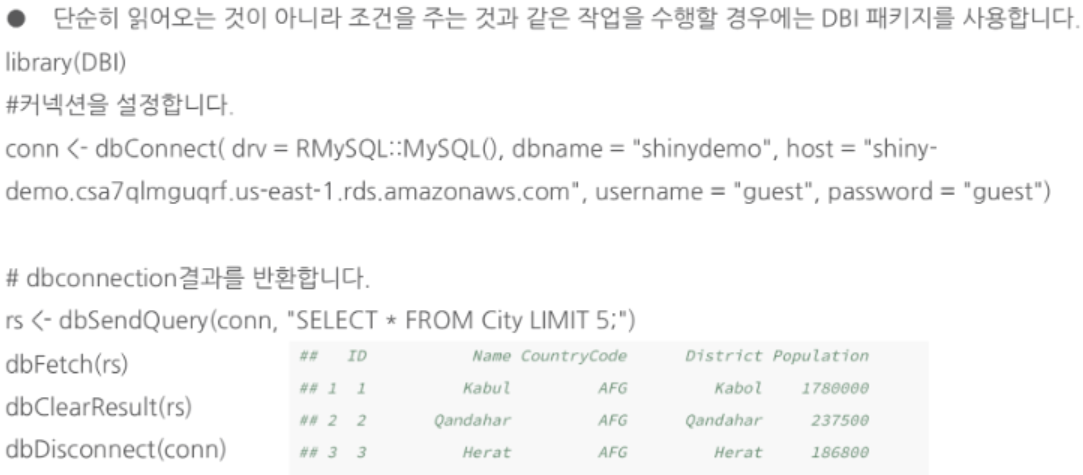

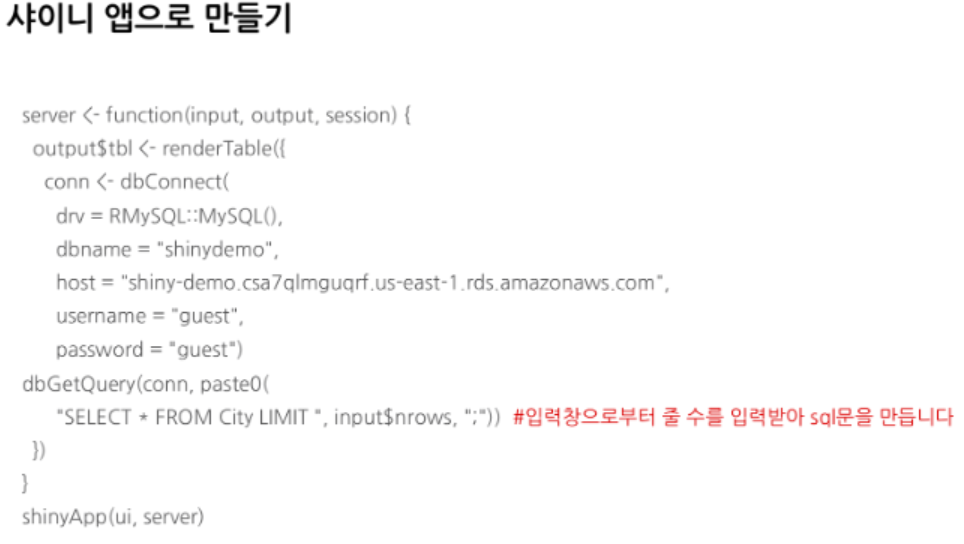

In [9]:
display_png(file="C:/Users/joyh1/Desktop/빅데이터_20-1/sns_picture/11.png")
display_png(file="C:/Users/joyh1/Desktop/빅데이터_20-1/sns_picture/12.png")